In [1]:
import pandas as pd
from sqlalchemy import create_engine
from os import environ

In [2]:
mysql_user = environ.get('mysql_user')
mysql_user_password = environ.get('mysql_user_password')
mysql_host = environ.get('mysql_host')
mysq_database = environ.get('mysq_database')
mysq_schema = environ.get('mysq_schema')


In [3]:
def df_read_data_from_mysql(mysql_credentials, query):
    engine = create_engine("mysql://{user}:{password}@{host}/{database}?charset=utf8mb4".format(
        user=mysql_credentials["user"],
        password=mysql_credentials["user_password"],
        host=mysql_credentials["host"],
        database=mysql_credentials["database"]))
    df = pd.read_sql(sql=query,con=engine)
    return df

In [4]:
mysql_credentials = {"user": mysql_user, "user_password":mysql_user_password, "host": mysql_host, "database": mysq_database}

sql_query_limit = 5

Tableau de répartition géographique des Tweets par pays

In [5]:
sql_query = "select \
case when github_countries.name is null then 'Unspecified' else github_countries.name end ""Pays"", \
count(*) ""Tweets"" \
from  {schema}.cars_all_brands_tweets left join \
{schema}.github_countries \
on cars_all_brands_tweets.calculated_country_code = github_countries.country_code \
group by 1 \
order by 2 desc \
limit {limit}".format(
        schema=mysql_schema,
limit=sql_query_limit)
df = df_read_data_from_mysql(mysql_credentials, sql_query)

In [6]:
df.head()

,Pays,Tweets
0,France,2949
1,Unspecified,786
2,United States,574
3,South Africa,304
4,Germany,287


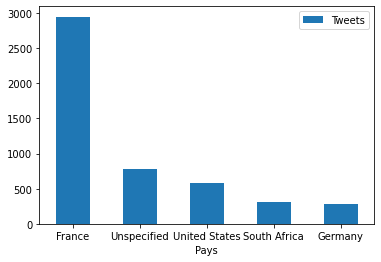

In [7]:
ax = df.plot.bar(x='Pays', y='Tweets', rot=0)

Tableau des Tweets de répartition des Tweets par langue (Nom complet de langue)

In [138]:
sql_query = "select \
case when cars_all_brands_tweets.lang = 'und' or github_languages.language_code is null \
then 'Unspecified' else github_languages.name end ""Langue"", \
count(*) ""Tweets"" \
from  {schema}.cars_all_brands_tweets \
left join {schema}.github_languages \
on upper(cars_all_brands_tweets.lang) = upper(github_languages.language_code) \
group by 1 \
order by 2 desc \
limit {limit}".format(
        schema=mysql_schema,
limit=sql_query_limit)
df = df_read_data_from_mysql(mysql_credentials, sql_query)

In [139]:
df.head()

,Langue,Tweets
0,French,3246
1,English,1853
2,Unspecified,408
3,German,398
4,Spanish,357


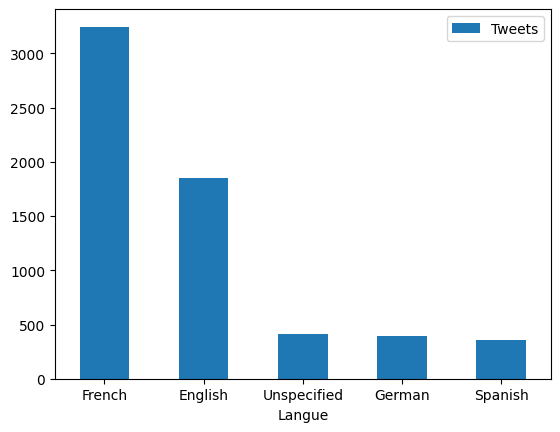

In [140]:
ax = df.plot.bar(x='Langue', y='Tweets', rot=0)

Répartition des Tweets par marque de voitures

In [141]:
sql_query = "select brand ""Marque"", \
count(*) ""Tweets"" \
from \
{schema}.cars_all_brands_tweets \
group by 1 \
order by 2 desc \
limit {limit}".format(
        schema=mysql_schema,
limit=sql_query_limit)
df = df_read_data_from_mysql(mysql_credentials, sql_query)

In [142]:
df.head()

,Marque,Tweets
0,Mercedes,3485
1,Renault,2252
2,Peugeot,1194


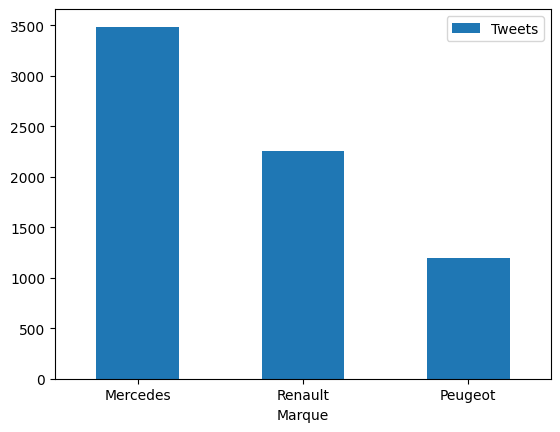

In [143]:
ax = df.plot.bar(x='Marque', y='Tweets', rot=0)

Tableau de répartition des Tweets par pays (Nom complet) et marque de voitures

In [144]:
sql_query = "select \
case when github_countries.name is null then 'Unspecified' else github_countries.name end ""Pays"", \
sum(case when cars_all_brands_tweets.brand = 'Mercedes' then 1 else 0 end)  ""Mercedes"", \
sum(case when cars_all_brands_tweets.brand = 'Peugeot' then 1 else 0 end)  ""Peugeot"", \
sum(case when cars_all_brands_tweets.brand = 'Renault' then 1 else 0 end)  ""Renault"" \
 from  {schema}.cars_all_brands_tweets \
 left join {schema}.github_countries on \
cars_all_brands_tweets.calculated_country_code = github_countries.country_code \
group by 1 \
order by 2 desc \
limit {limit}".format(
        schema=mysql_schema,
limit=sql_query_limit)
df = df_read_data_from_mysql(mysql_credentials, sql_query)

In [145]:
df.head()

,Pays,Mercedes,Peugeot,Renault
0,France,1106.0,541.0,1302.0
1,Unspecified,599.0,97.0,90.0
2,United States,410.0,71.0,93.0
3,South Africa,297.0,5.0,2.0
4,Germany,264.0,17.0,6.0


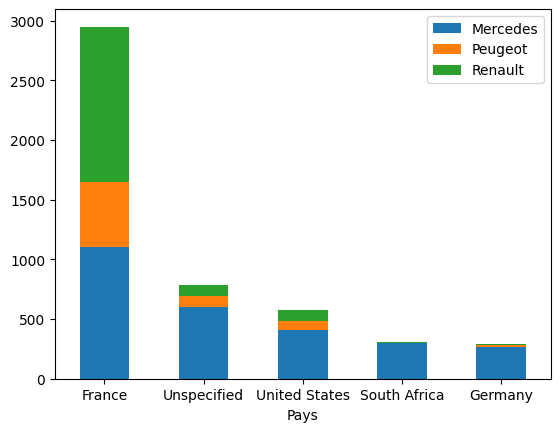

In [146]:
ax = df.plot.bar(x='Pays',rot=0,stacked=True)